<a href="https://colab.research.google.com/github/gayangana/EN4553_Assignments/blob/main/Assignment_2_170344X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EN4353 - Radar and Navigation**
# **Assignment 2**

I.U.G.Leelarathne - 170344X

Editable Link to Google Colab Notebook :  https://colab.research.google.com/drive/128soTEUuGeLq5D-55jwBYwTeyLIYKJTl?usp=sharing

# **Radar Description**
   
* Raw Video Sampling Rate $(f_s) = 1080\ kHz$
* Pulse Repetition Frequency $(f_r) = 1800\ Hz$
* Horizontal Beam Width $(θ_H) = 2^0$
* Radar Frequency $(f_{radar}) = 720\ MHz$

In [38]:
#Uncomment the line to upload/download files
#from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Upload Files**

If it is necessary to upload a file and use it as a test case, uncomment the next cell and upload the required files. Otherwise, dataset can be imported by giving the url from the proceeding cells

In [39]:
# uploaded = files.upload()

In [40]:
Q_component = "https://raw.githubusercontent.com/gayangana/EN4553_Assignments/8bceb6650a78ef76d81160ac8eef746779a070c2/Assignment_2/imag_component.csv"
I_component = "https://raw.githubusercontent.com/gayangana/EN4553_Assignments/8bceb6650a78ef76d81160ac8eef746779a070c2/Assignment_2/real_component.csv"

# **Question 1**
\begin{align*}
I(t) &=A(t)cos(2\pi f_dt-\pi)\\
Initially,\ signal\ is\ analog\ to\ digital\ converted\\ at\ 1080\ kHz\ (F_s)\ and\ let\ the\ sampling\ time\ be\ T_s\\ 
\\
Ts &= \frac{1}{F_s}\\
t&=nT_s\\
I_0[n] &= A(nT_s)cos(2\pi f_d(nT_s)-\pi) \\
\\
For\ MTI\ Cancellation\ samples\ are\ passed\ through\\ a\ MTI\ Canceller\ with\ impulse\ response\ h[n] \\
\\
h[n] &= \delta[n]-4\delta[n-1]+\delta[n-2] \\
I_1[n] &= I_0[n]h[n]\\
&=I_0[n](\delta[n]-4\delta[n-1]+\delta[n-2])\\
&=I_0[n]-4I_0[n-1]+I_0[n-2]\\
\\
Let\ k&=2\pi f_dT_s\\
\\
I_1[n]&=A[n]cos[kn-\pi]-4A[ n-1]cos[k(n-1)-\pi]+A[n-2]cos[k(n-2)-\pi]\\
\\
It\ is\ given\ that,\\
A[n] \approx A[n-1] \approx A[n-2]\\
\\
I_1[n]&=A[n]cos[kn-\pi]-4A[n]cos[k(n-1)-\pi]+A[n]cos[k(n-2)-\pi]\\
&=A[n]\left\{-cos(kn)+4cos[k(n-1)]-cos[k(n-2]\right\}\\
&= A[n]\left\{4cos[k(n-1)]-\left[cos(kn)+cos[k(n-2)]\right] \right\}\\
&= A[n]\left\{4cos[k(n-1)]-2cos[k(n-1)]cos(k)\right\}\\
&= 2A[n]cos[k(n-1)]\left[2-cos(k)\right]\\
Samples\ further\ downsampled\ by\ 20\ and\ 10^{th}\\ sample\ from\ every\ range\ slot\ is\ selected. \\
\\
I[n] &= I_1[20n+10]\\
&=2A[(20n+10)T_s]cos[k(20n+9)]\left[2-cos(k)\right]\\
&=2A[(20n+10)T_s]cos[2\pi f_d T_s(20n+9)][2-cos(2\pi f_d T_s)]\\
\\
 Similarly, \\
Q(t) &= A(t)sin(2\pi f_dt-\pi)\\
\\
 Q_0[n] &= A(nT_s)sin(2\pi f_d(nT_s)-\pi) \\
 Q_1[n] &= Q_0[n]h[n]\\
 &= A[n]\left\{-sin(kn)+4sin[k(n-1)]-sin[k(n-2]\right\}\\
 &= A[n]\left\{4sin[k(n-1)]-2sin[k(n-1)]cos(k)\right\}\\
 &= 2A[n]sin[k(n-1)]\left[2-cos(k)\right]\\
 Q[n] &= Q_1[20n+10]\\
 &=2A[(20n+10)T_s]sin[2\pi f_d T_s(20n+9)][2-cos(2\pi f_d T_s)]\\
 \\
 X[n]&=I[n]+jQ[n]\\ 
 \therefore X[n]&= 2A[T_s(20n+10)][2-cos(2\pi f_d T_s)]\left\{cos[2\pi f_d T_s(20n+9)]+jsin[2\pi f_d T_s(20n+9)]\right\} 
\end{align*}


# **Load Dataset**
Change the variable `dataset_path_I`,`dataset_path_Q`' to select the file containing data

In [41]:
dataset_path_I = I_component
dataset_path_Q = Q_component

I = pd.read_csv(dataset_path_I,header=None)
Q = pd.read_csv(dataset_path_Q,header = None)

In [42]:
#Define Parameters

n_samples = 27000
n_range_slots = 30  #col
n_pulses = int(n_samples/n_range_slots) #rows
f_r = 1800
radar_freq = 720*10e6
c = 3*10e8

# **Question 2**

As shown in question 1,
$X[n] = 2A[T_s(20n+10)][2-cos(2\pi f_d T_s)]\left\{cos[2\pi f_d T_s(20n+9)]+jsin[2\pi f_d T_s(20n+9)]\right\}$

Let the phase of complex number $X[n]$ be $α$

\begin{align}
\alpha &= tan^{-1}\left\{tan\left[2\pi f_dT_s\left(20n+9\right)\right]\right\}\\
\alpha &= 2\pi f_dT_s\left(20n+9\right)\\
\end{align}


Ground clutter has velocities closer to zero. Therefore doppler shift ($f_d$) from ground clutter will be approximately zero.

$\therefore\ f_d\to 0 \implies \alpha \to 0$ 

$\therefore$ By analyzing the phase of each sample in the data matrix, if the phase is closer to zero, we can assume that sample is reflected from the ground clutter.

a zero velocity filter can be implemented to remove the ground clutter by setting a threshold to filter out ground clutter.

# **Question 3**

Initially, the magnitude and the phase of the complex data matrix is observed to identify ground clutter. We can clearly see that the magnitude of the samples in the first few range slots are very high when we compare with the other samples. The phase of the samples in the first few range slots are also closer to zero. 

Therefore, a Zero Velocity Filter is implemented using the phase of samples with a threshold of $0.06^0$ to filter out ground clutter.

## **Zero Velocity Filter**##
If $∠X[n] < 0.06^0 \implies |X[n]| =0$ 

Otherwise $X[n]$ is unchanged.

Ground clutter is encoded and stored to use in the next sections

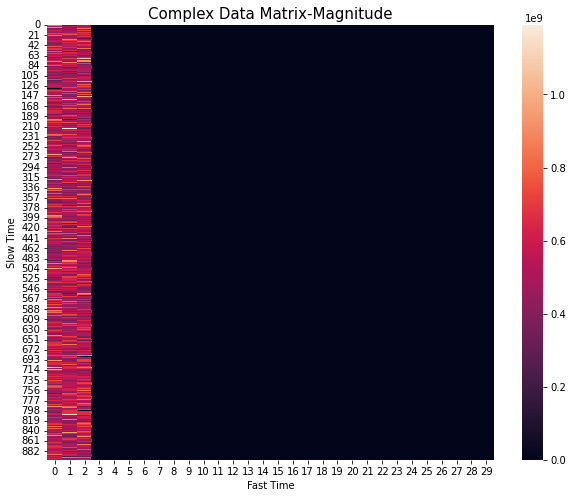

In [43]:

X = np.array(I +1j*Q)

complex_data_matrix = X.reshape(n_pulses,n_range_slots)

plt.figure(figsize=(10,8))
sns.heatmap(abs(complex_data_matrix), cbar=True)
plt.title("Complex Data Matrix-Magnitude", fontsize= 15)
plt.xlabel("Fast Time") 
plt.ylabel('Slow Time')
plt.show()

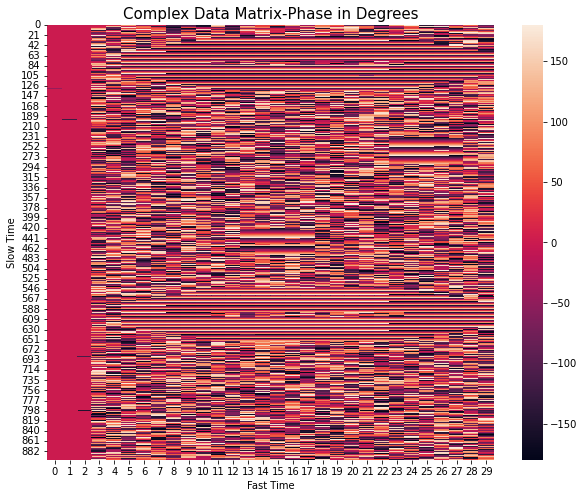

In [44]:
angle_data_matrix = np.angle(complex_data_matrix, deg = True)
plt.figure(figsize=(10,8))
sns.heatmap(angle_data_matrix, cbar=True)
plt.title("Complex Data Matrix-Phase in Degrees", fontsize= 15)
plt.xlabel("Fast Time") 
plt.ylabel('Slow Time')
plt.show()

In [45]:
#Zero Velocity Filter
def zero_velocity_filter(matrix,threshold):
    phase_matrix = np.angle(matrix,deg=True)
    filtered_matrix = np.where(abs(phase_matrix) > threshold,matrix,0) 
    ground_clutter = np.where(abs(phase_matrix) > threshold,0,2) #Encode ground clutter to use in next sections
    return filtered_matrix,ground_clutter

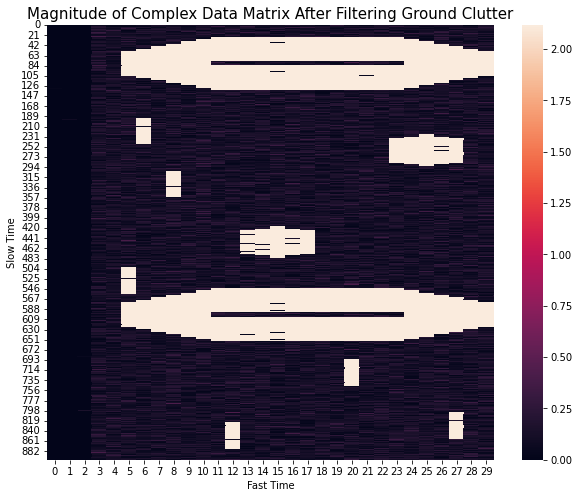

In [46]:
#Apply zero velocity filter with a threshold of 0.06 degrees
zvf_matrix,ground_clutter = zero_velocity_filter(complex_data_matrix,0.06)

plt.figure(figsize=(10,8))
sns.heatmap(abs(zvf_matrix), cbar=True)
plt.title("Magnitude of Complex Data Matrix After Filtering Ground Clutter", fontsize= 15)
plt.xlabel("Fast Time") 
plt.ylabel('Slow Time')
plt.show()

# **Question 4**

Centre freuqencies for the velocity filters assossiated with each target can be calucated as,

*   Centre Frequency of the velocity filter $f_c$
*   Radial velocity of the object $v_r$
*   Wavelegth of the radar frequncy $λ_{radar}$
*   Radar Frequency $(f_{radar}) = 720\ MHz$
*   Speed of light $(c)$ = $3\times 10^8\ ms^{-1}$ 
\begin{align}
f_c &= \frac{2v_r}{λ_{radar}}\\
f_c &= \frac{2v_rf_{radar}}{c}
\end{align}




In [47]:
#Calculate centre frequencies for each target
targets = ['Cloud', 'Ground Clutter', 'Rain Clutter','Birds','Aircrafts']
colors = ['red','green','blue','black', 'purple']
v_r = [50, 0 , 20, 35,150]

f_d =[]

print('Centre Frequencies')
for i in range(len(v_r)):  
  f_c = 2*v_r[i]*radar_freq/c
  f_d.append(f_c)
  print(str(targets[i]) +' : '+str(f_c)+' Hz')


Centre Frequencies
Cloud : 240.0 Hz
Ground Clutter : 0.0 Hz
Rain Clutter : 96.0 Hz
Birds : 168.0 Hz
Aircrafts : 720.0 Hz


##**Centre Frequencies of Velocity Filters**##

Object        | Centre Frequency
--------------|------------------
Cloud         | 240 Hz
Ground Clutter| 0 Hz
Rain Clutter  | 96 Hz
Birds         | 168 Hz
Air Crafts    | 720 Hz

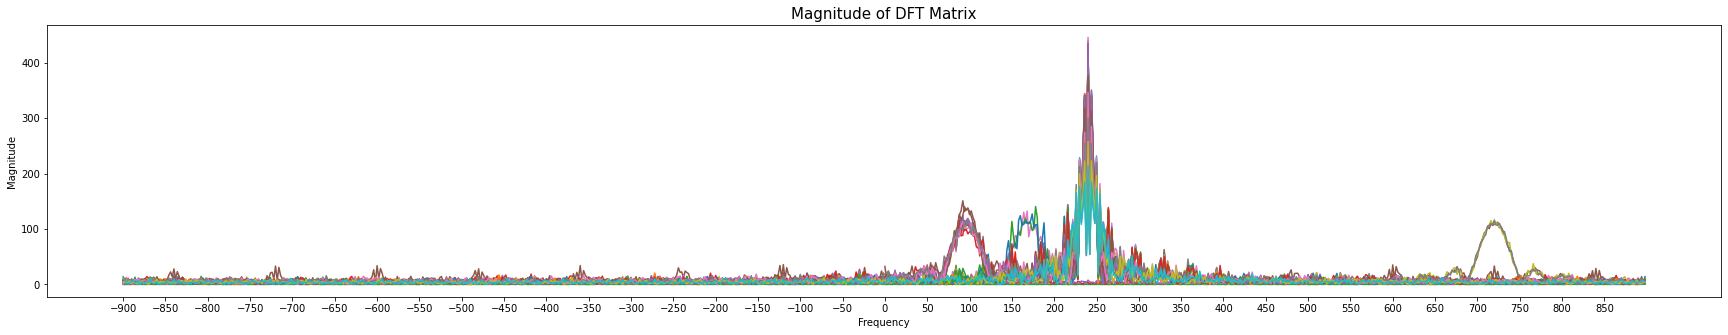

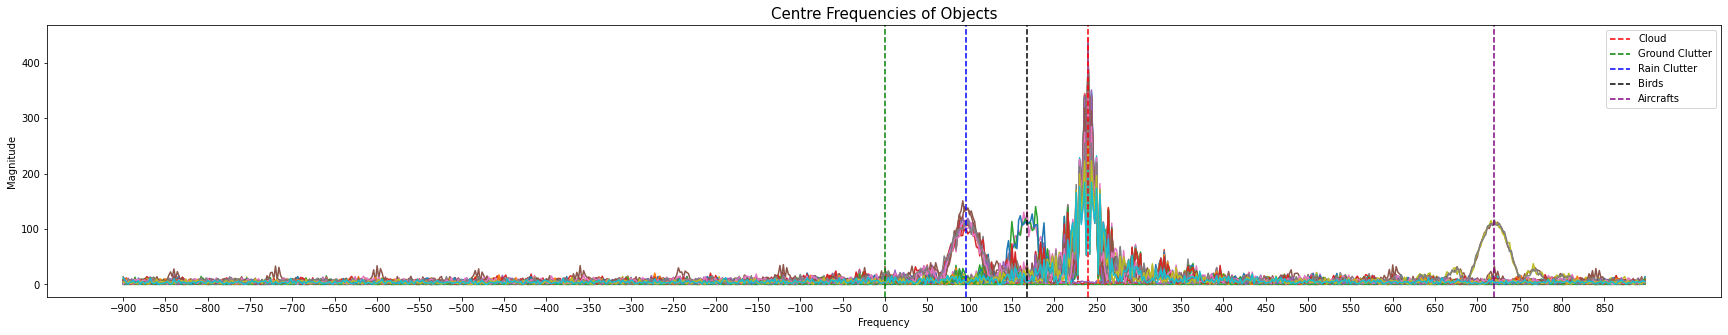

In [48]:
#Apply Descrete Fourier Transform to Data Matrix
#Ground clutter is already filtered with zero velocity filter. Therefore we cannot expect frequencies closer to 0 Hz

DFT_matrix = np.fft.fft(zvf_matrix,axis = 0)
N=n_pulses

#Plot DFT matrix
pos_freq = np.arange(0,f_r/2,f_r/N)
neg_freq = np.arange(-f_r/2,0,f_r/N)

plt.figure(figsize=(30,5))
plt.plot(pos_freq,abs(DFT_matrix[:N//2]))
plt.plot(neg_freq,abs(DFT_matrix[N//2:]))
plt.title("Magnitude of DFT Matrix", fontsize= 15)
plt.xlabel("Frequency") 
plt.ylabel('Magnitude')
plt.xticks(range(-f_r//2,f_r//2,50))
plt.show()

plt.figure(figsize=(30,5))
plt.plot(pos_freq,abs(DFT_matrix[:N//2]))
plt.plot(neg_freq,abs(DFT_matrix[N//2:]))
for j in range(len(f_d)):
    plt.axvline(x=f_d[j],label = targets[j],color = colors[j],ls="--")

plt.title("Centre Frequencies of Objects", fontsize= 15)
plt.xlabel("Frequency") 
plt.ylabel('Magnitude')
plt.xticks(range(-f_r//2,f_r//2,50))
plt.legend()
plt.show()

## **Velocity Filters**##
Velocity filters are implemented to filter out different objects from their radial velocity.

* Centre Frequency of the filter - $f_c$
* Bandwidth of the filter - $BW$
* Frequency respose of filter - $H(f)$

* Upper cutoff frequncy $f_u = f_c+\frac{BW}{2} $
* Upper cutoff frequncy $f_l = f_c-\frac{BW}{2} $


For any given frequency $f$,

if $f\ge f_l\ and\ f\le f_u\ \implies H(f) = 1 $ 
otherwise $H(f)=0$

In [49]:
#Band Pass Filter
def band_pass_filter(centre_freq,BW,fs,N):

    lower_cutoff = centre_freq - BW/2
    upper_cutoff = centre_freq + BW/2

    pos_freq = np.arange(0, fs / 2, fs / N)
    pos_amp = np.where((pos_freq >= lower_cutoff) & (pos_freq <= upper_cutoff),1,0)

    neg_freq = np.arange(-fs / 2, 0, fs / N)
    neg_amp = np.where((abs(neg_freq) >= lower_cutoff) & (abs(neg_freq) <= upper_cutoff),0,0)

    amplitude = np.concatenate([pos_amp,neg_amp]).reshape(N,1)
    freqs = np.concatenate([pos_freq, neg_freq]).reshape(N,1)
    return freqs,amplitude 


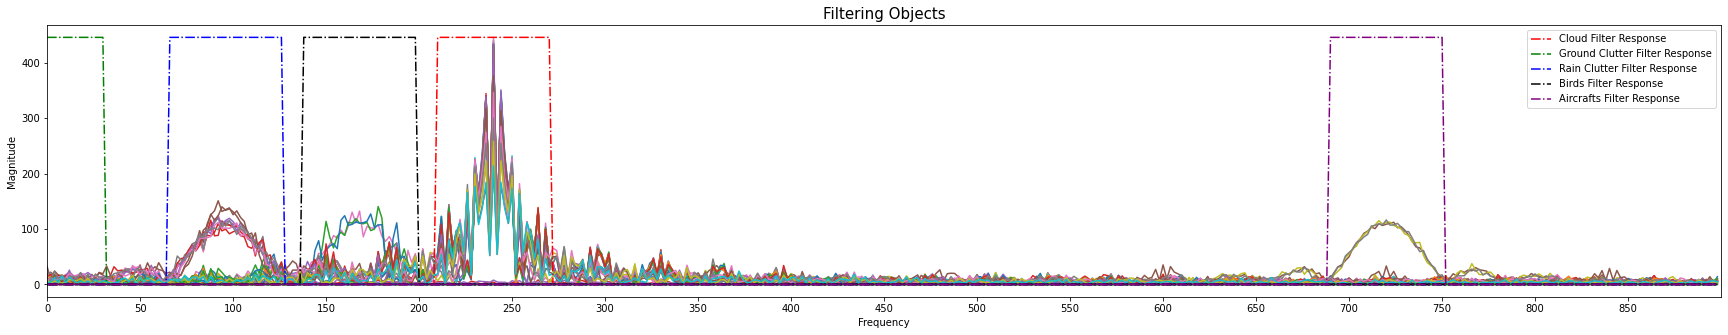

In [50]:
#Determine the bandwdith of Filter

BW = 60

pos_freq = np.arange(0,f_r/2,f_r/N)
neg_freq = np.arange(-f_r/2,0,f_r/N)

#For visulazing purposes, amplitude of the filter is scaled up
max_val = np.max(np.abs(DFT_matrix))

plt.figure(figsize=(30,5))
plt.plot(pos_freq,abs(DFT_matrix[:N//2]))
plt.plot(neg_freq,abs(DFT_matrix[N//2:]))
for j in range(len(f_d)):
  plt.plot(band_pass_filter(f_d[j],BW,f_r,N)[0],band_pass_filter(f_d[j],BW,f_r,N)[1]*max_val,ls="dashdot",color = colors[j],label = targets[j]+' Filter Response')

plt.title("Filtering Objects", fontsize= 15)
plt.xlabel("Frequency") 
plt.ylabel('Magnitude')
plt.xlim(0,f_r//2)
plt.xticks(range(0,f_r//2,50))
plt.legend()
plt.show()

By inspection, Bandwidth of filters are selected as $60\ Hz$

To differentiate objects, based on the radial velocity filter banks are implemented. 

DFT matrix $\left(X(f)\right)$is obtained by applying FFT to each columnn of the data matrix separately. Then the velocity filters are applied to filiter out the targets withing the bandwidth of the filter. If the frequency response of the filter is $H(f)$.

5 velocity filters are used with a bandwidth of $60\ Hz$ and centre frequencies derived in the previous section.

Filtered Data Matrix,

 $X(f)_{filtered}$ = $X(f)H(f)$

After filtering, IDFT algorithm is applied to all the colunms to obtain filtered time domain data matrix.

$X[n]_{filtered}=IDFT\left\{X(f)_{filtered}\right\}$

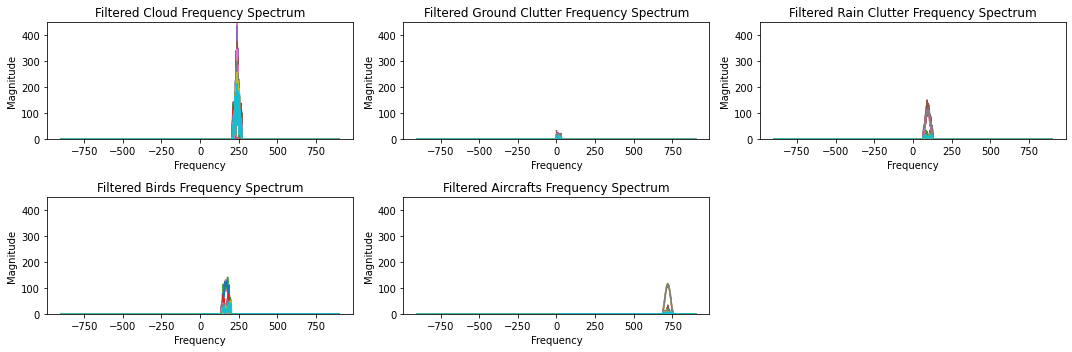

In [51]:
#Filtering different objects

filtered_matrices =[]
plt.figure(figsize=(15,5))
for i in range(len(targets)):
    filter = band_pass_filter(f_d[i],BW,f_r,N)[1]
    filtered_DFT_matrix = np.multiply(DFT_matrix,filter)
    plt.subplot(2,3,i+1)
    plt.tight_layout()
    plt.plot(pos_freq,abs(filtered_DFT_matrix[:N//2]))
    plt.plot(neg_freq,abs(filtered_DFT_matrix[N//2:]))
    plt.title('Filtered '+targets[i]+' Frequency Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.ylim(0,450)
    
    #Apply IDFT to transform data matrix to time domain
    IDFT_matrix = np.fft.ifft(filtered_DFT_matrix,axis = 0)
    filtered_matrices.append(IDFT_matrix)
plt.show()

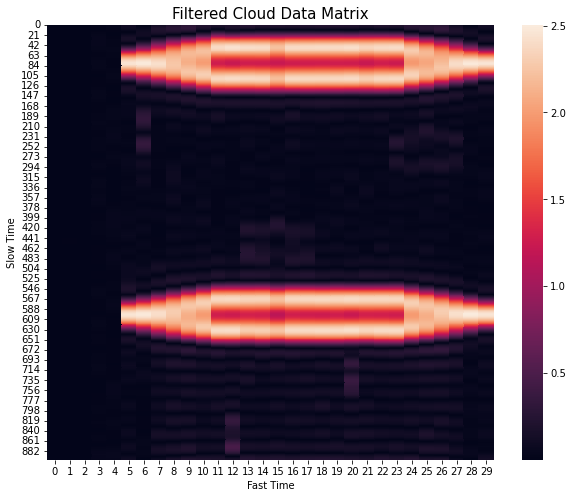

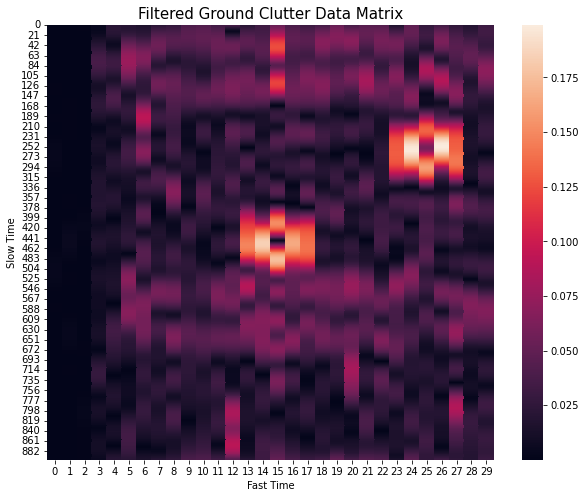

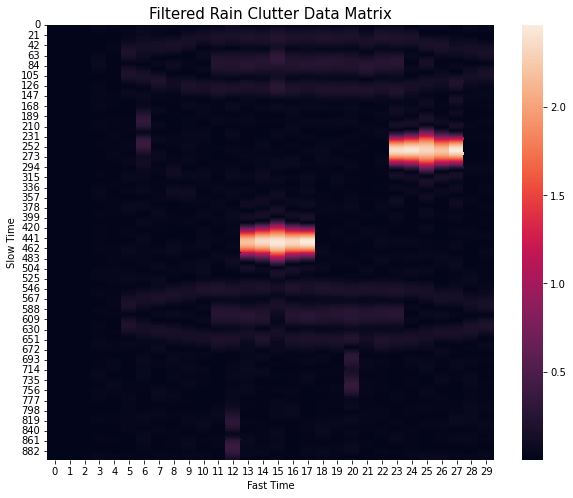

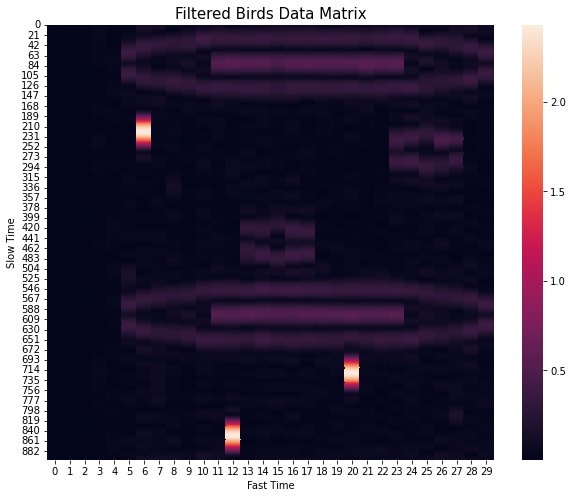

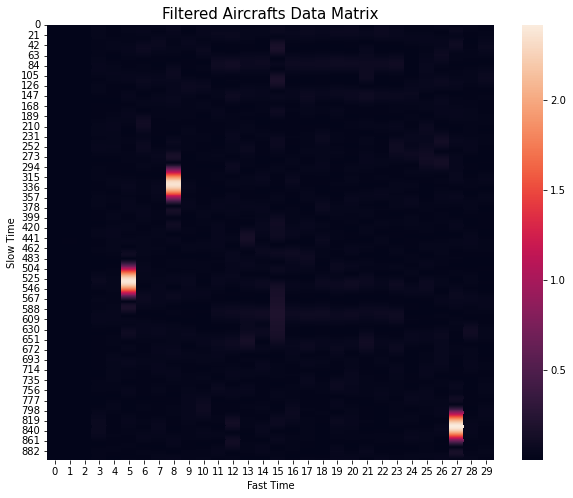

In [52]:
#Thresholding and Encoding the filtered matrices

thresholds = [1.05,0,0.9,1.05,0.5]
encoded_matrices = []
target_matrix=np.zeros((n_pulses,n_range_slots))

for i in range(len(filtered_matrices)):
    if (i==1):
        Sum = np.sum(ground_clutter,axis=0) #Binary integration to filter noise in ground clutter
        for j in range(len(Sum)):
            if (Sum[j]<450):
                ground_clutter[:,j] = 0
        encoded_matrix = ground_clutter
    else:
        encoded_matrix = np.where(abs(filtered_matrices[i])>thresholds[i],i+1,0)
    target_matrix += encoded_matrix
    encoded_matrices.append(encoded_matrix)
    pd.DataFrame(encoded_matrix).to_csv(targets[i]+' Encoded Data Matrix.csv',header=False,index=False)

    #Uncoment to download the files
    #files.download(targets[i]+' Encoded Data Matrix.csv')
    
    plt.figure(figsize=(10,8))
    sns.heatmap(abs(filtered_matrices[i]), cbar=True)
    plt.title('Filtered '+targets[i]+' Data Matrix', fontsize= 15)
    plt.xlabel("Fast Time") 
    plt.ylabel('Slow Time')
    plt.show()

  
  
 

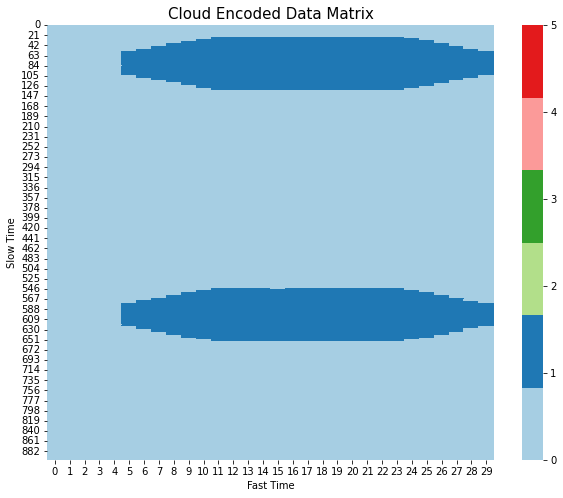

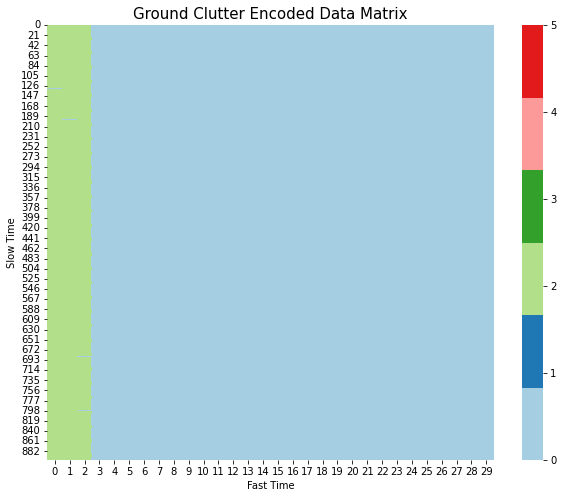

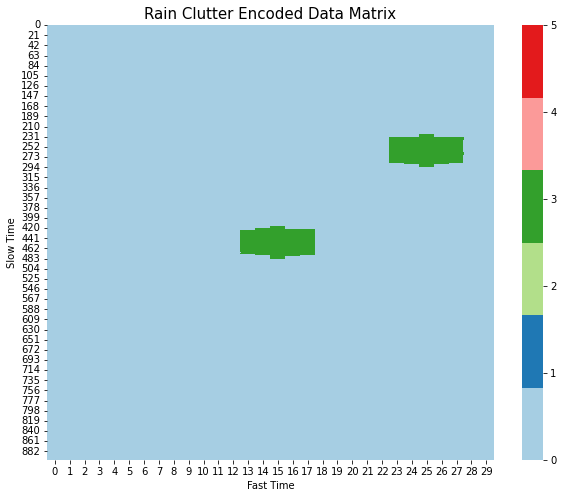

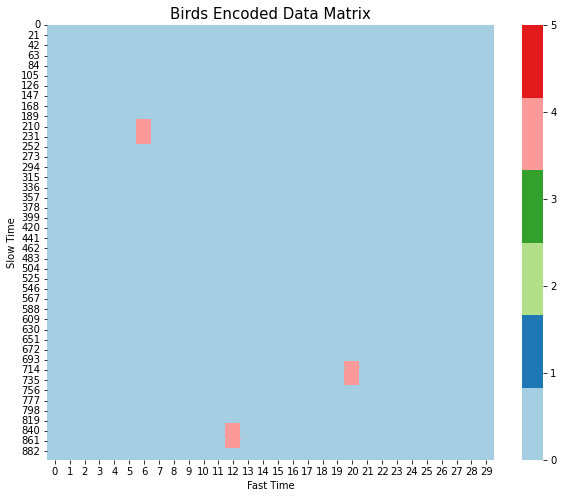

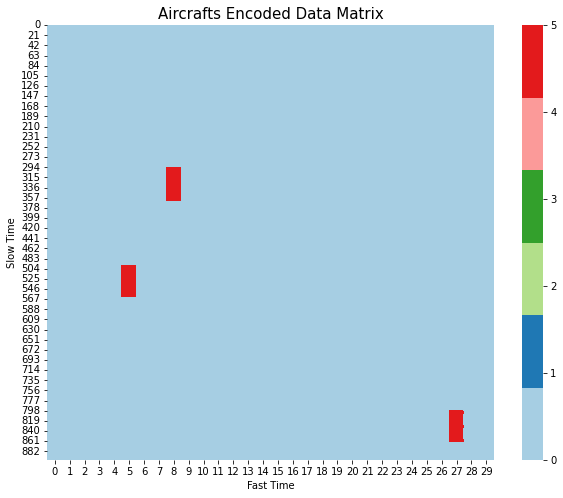

In [53]:
for i in range(len(encoded_matrices)):
    plt.figure(figsize=(10,8))
    cmap = sns.color_palette('Paired', 6)
    fig = sns.heatmap(abs(encoded_matrices[i]), cbar=True,cmap=cmap,vmin=0, vmax=5)
    plt.title(targets[i]+' Encoded Data Matrix', fontsize= 15)
    plt.xlabel("Fast Time") 
    plt.ylabel('Slow Time')
    colorbar = fig.collections[0].colorbar
    colorbar.set_ticks(np.linspace(0,5,6))
    plt.show()




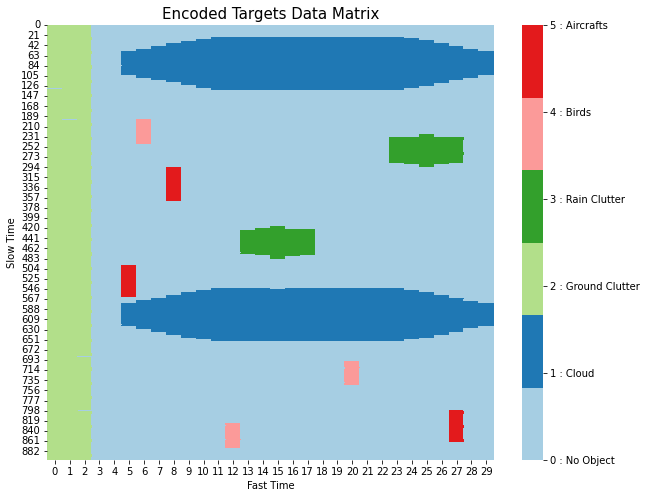

In [54]:
plt.figure(figsize=(10,8))
cmap = sns.color_palette('Paired', 6)
fig = sns.heatmap(np.abs(target_matrix), cbar=True,cmap=cmap,vmin=0, vmax=5)
plt.title('Encoded Targets Data Matrix', fontsize= 15)
plt.xlabel("Fast Time") 
plt.ylabel('Slow Time')
colorbar = fig.collections[0].colorbar
colorbar.set_ticks(np.linspace(0,5,6))
colorbar.set_ticklabels(['0 : No Object','1 : Cloud', '2 : Ground Clutter', '3 : Rain Clutter','4 : Birds','5 : Aircrafts'])
plt.show()

In [55]:
#Uncoment to download the encoded targets file

# pd.DataFrame(target_matrix).to_csv('Targets Encoded Data Matrix.csv',header=False,index=False)
# files.download('Targets Encoded Data Matrix.csv')